## 개요
파이썬 환경에서 공간데이터의 좌표계를 확인하고, 다른 좌표계로 변환해 봅시다.

---

## 사용할 패키지 준비

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## 사용할 데이터 준비
앞서 사용한 행정동 데이터를 사용합니다.

In [16]:
shp_path = 'data/shp/NGII_CDM_행정경계(시도)/Z_NGII_N3A_G0010000.shp'
sido_gdf = gpd.read_file(shp_path, encoding='cp949')

In [17]:
sido_gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,None,None,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,None,None,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,None,None,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,None,None,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,None,None,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


## 좌표계를 확인해 봅시다

In [18]:
sido_gdf.crs

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## 동일하지만 .prj 파일이 없는 데이터는?   

In [19]:
shp_path2 = 'data/shp/sido_not_prj/Z_NGII_N3A_G0010000.shp'
sido_gdf2 = gpd.read_file(shp_path2)

In [20]:
print(sido_gdf2.crs)

None


## 좌표계 정보가 없는 공간데이터에 좌표계 정보를 부여해 주려면? (좌표계 정의)

In [21]:
sido_gdf2.crs = "epsg:5179"

In [22]:
sido_gdf2.crs

<Derived Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## 원하는 다른 좌표계로 변환하려면?     

In [23]:
sido_gdf4326 = sido_gdf2.to_crs(epsg=4326) 
sido_gdf4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
sido_gdf4326.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,Á¦ÁÖÆ¯º°ÀÚÄ¡µµ,HJD004,None,None,"MULTIPOLYGON (((126.77414 33.56657, 126.77414 ..."
1,ARB0100000000002F,4800000000,°æ»ó³²µµ,HJD004,None,None,"MULTIPOLYGON (((128.03946 34.99262, 128.03946 ..."
2,ARB0100000000003G,4700000000,°æ»óºÏµµ,HJD004,None,None,"MULTIPOLYGON (((129.34094 37.14464, 129.34099 ..."
3,ARB0100000000004H,4600000000,Àü¶ó³²µµ,HJD004,None,None,"MULTIPOLYGON (((126.39023 35.02427, 126.39024 ..."
4,ARB0100000000005I,4500000000,Àü¶óºÏµµ,HJD004,None,None,"MULTIPOLYGON (((126.98353 36.14769, 126.98359 ..."


---

## EPSG에 등록되지 않은 좌표계로는 변환이 안되나요?    
아래와 같이 to_crs의 괄호 안에 좌표변환 하고자 하는 proj4text 정보를 넣어주면 됩니다.   
새로운 지오데이터프레임 = sido_gdf2.to_crs(proj4text) 

In [25]:
sido_gdf_katech = sido_gdf.to_crs("+proj=tmerc +lat_0=38 +lon_0=128 +k=0.9999 +x_0=400000 +y_0=600000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43") 
sido_gdf_katech.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,None,None,"MULTIPOLYGON (((286385.042 108499.996, 286385...."
1,ARB0100000000002F,4800000000,경상남도,HJD004,None,None,"MULTIPOLYGON (((403800.319 266002.967, 403800...."
2,ARB0100000000003G,4700000000,경상북도,HJD004,None,None,"MULTIPOLYGON (((519318.662 505612.230, 519323...."
3,ARB0100000000004H,4600000000,전라남도,HJD004,None,None,"MULTIPOLYGON (((253295.528 270695.544, 253296...."
4,ARB0100000000005I,4500000000,전라북도,HJD004,None,None,"MULTIPOLYGON (((308725.945 394623.022, 308730...."


<AxesSubplot: >

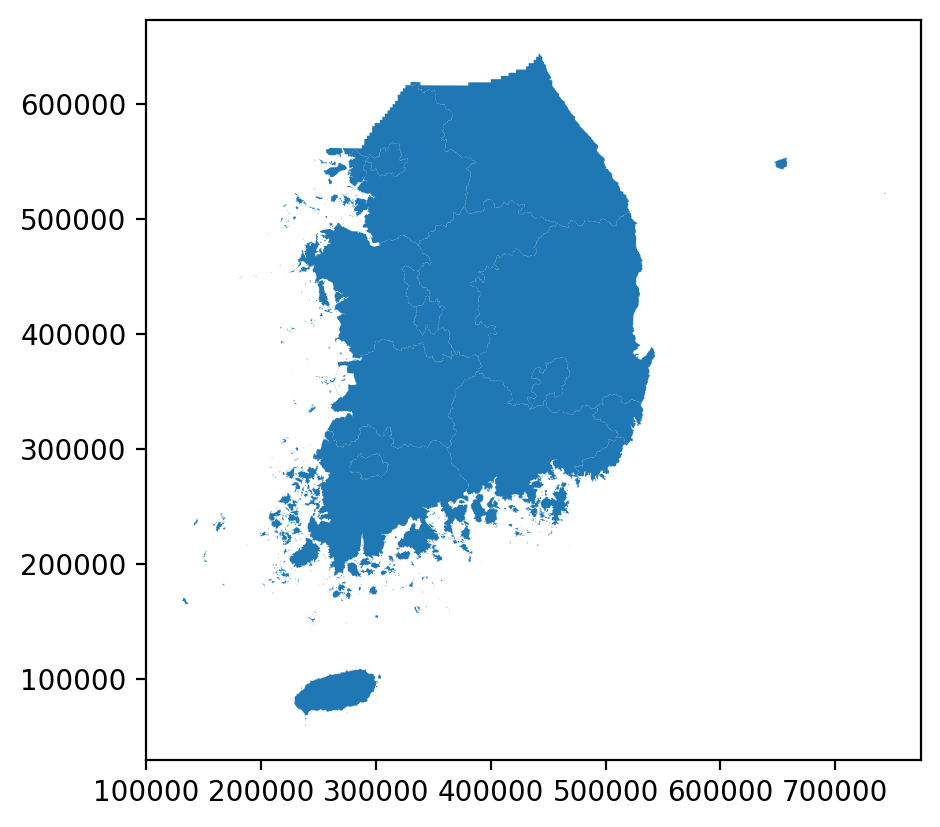

In [26]:
sido_gdf_katech.plot(figsize=(5,5))

### proj4text   
proj4text : proj에서 사용하는 형식의 좌표체계 정보   
srtext : WKT(Well-Known Text) 형식의 OGC 표준  

https://spatialreference.org/ref/epsg/4326/ 
위 사이트에서 OGC WKT, Proj4를 각각 클릭해 보십시오      

PostGIS를 쓰시는 경우 아래의 SQL을 실행해 보십시오   
select * from spatial_ref_sys where srid=4326;

srid      | 4326  
auth_name | EPSG  
auth_srid | 4326  
srtext    | GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]  
proj4text | +proj=longlat +datum=WGS84 +no_defs 

### 대한민국 좌표계  
https://www.osgeo.kr/17  

### 수고 많으셨습니다!!! 